## Derivada

### Derivada una variable 

El cálculo es una herramienta que nos que nos va a permitir estudiar como cambian las funciones con respecto a sus variables. Una función intuitivamente es una especie de máquina, que recibe valores de entrada y los utiliza para generar un valor de salida, a dichos valores de entra es a los que llamaremos variables de la función.

<img src="Función-intuición.png" width = 200 height = 200> 

Para hacernos una idea ce como cambia una función con respecto a sus variables vamos a fijarnos en la pendiente de la recta tangente a la gráfica de la función en un punto. podemos ver que entre más inclinada esta la recta tangente, es decir mayor es su pendiente, mayor es el cambio en la función.




<img src="Derivada en una variable.png" width = 400 height = 400>


Para poder obtener el valor de dicha pendiente nos apoyaremos del concepto de _límite,_ tomemos dos puntos sobre la gráfica de la función y unamos dichos puntos por una recta, esta recta es una aproximación a la recta tangente, y podemos ver que no es una muy buena, pero noten que si dejamos fijo un punto y desplazamos el otro hacia el primero, entre más cerca estén dichos puntos mejor es la aproximación a la tangente, y de hecho en el límite la aproximación es perfecta, es justamente a dicho límite al que llamaremos la derivada de una función en un punto.


<img src="Aproximación a la tangente.gif" width = 400 height = 400>



$$f^{\prime }(x)=\lim _{\Delta x \to 0}{\frac{f(x+ \Delta x)-f(x)}{\Delta x}}$$


En la formulación llamamos $\Delta x$ a la distancia que separa a dichos puntos, cuando la distancia de separación $\Delta x$ tiende a 0 obtenemos la derivada. La podemos entender como la tasa de cambio de la variable $y$ en función de $x$

In [2]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [16]:
x = symbols('x')

In [3]:
f = 2 * x ** 2

In [4]:
f

2*x**2

In [5]:
f.diff()

4*x

In [9]:
def f(x):
    return 2 * x ** 2

In [10]:
def df(x):
    return 4 * x

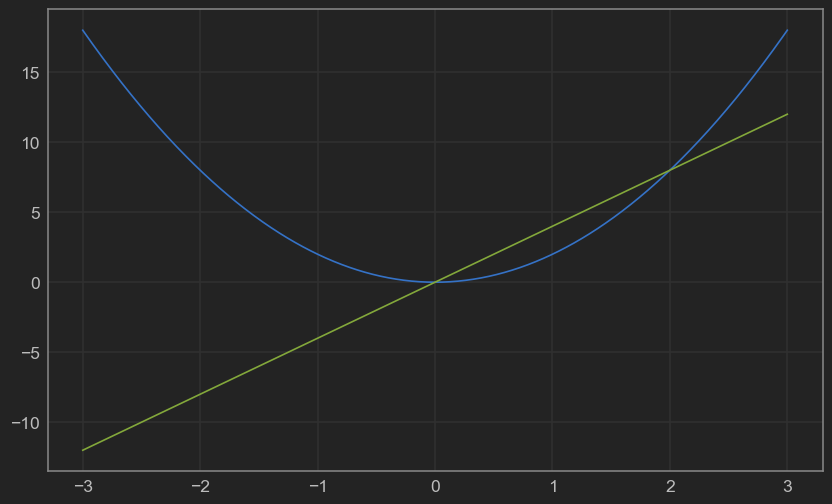

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))

x = np.linspace(-3, 3, 1000)
ax.plot(x, f(x))
ax.plot(x, df(x));

$$F: \mathbb{R}^n \rightarrow \mathbb{R}$$

$$F: \mathbb{R}^n \rightarrow \mathbb{R}^m$$

$$\mathbb{Z}$$

In [12]:
dx = Symbol('\Delta x')

In [13]:
dx

\Delta x

In [18]:
L = (2 * (x + dx) ** 2 - 2 * x ** 2) / dx

In [19]:
L

(-2*x**2 + 2*(\Delta x + x)**2)/\Delta x

In [20]:
limit(L, dx, 0)

4*x

$$f^{\prime }(x)=\lim _{\Delta x \to 0}{\frac{f(x+ \Delta x)-f(x)}{\Delta x}}$$

In [2]:
def deriv(func: "Function", x, delta = 0.0000001):
    return (func(x + delta) - func(x)) / delta

In [24]:
f(2)

8

In [25]:
deriv(f, 2)

8.000000182306621

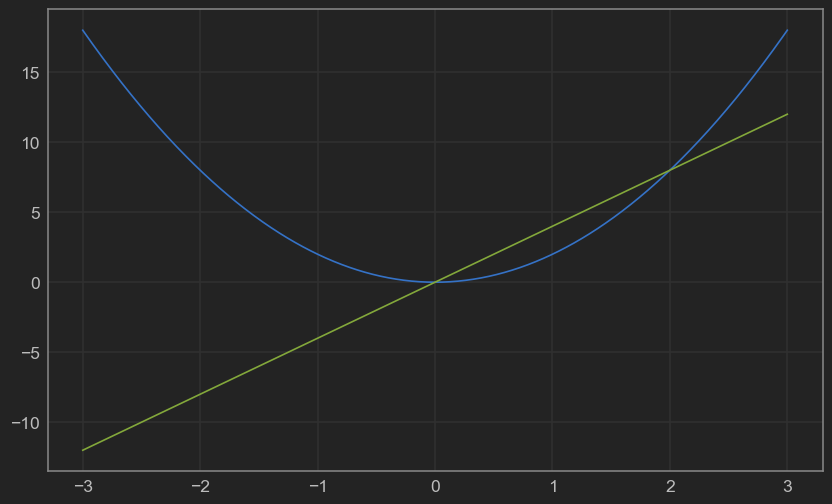

In [26]:
fig, ax = plt.subplots(figsize = (10, 6))

x = np.linspace(-3, 3, 1000)
ax.plot(x, f(x))
ax.plot(x, deriv(f, x));

$$sinc(x) = \frac{\sin x}{x}$$

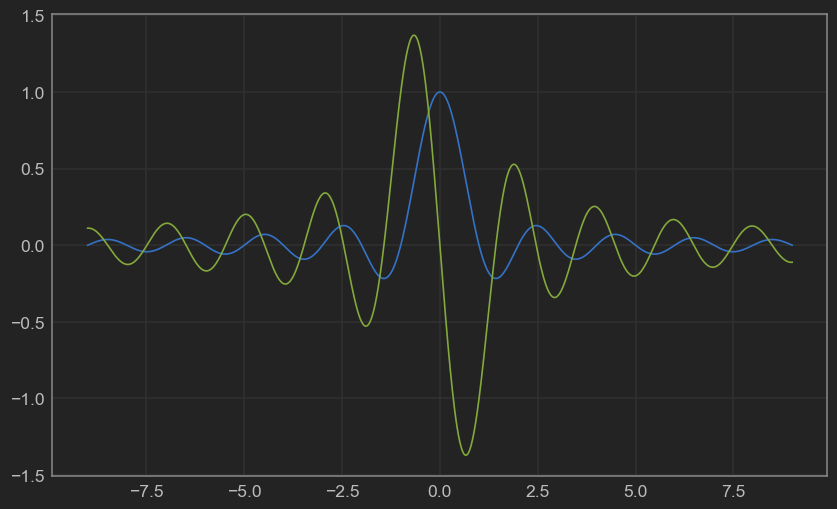

In [33]:
fig, ax = plt.subplots(figsize = (10, 6))

x = np.linspace(-9, 9, 1000)
ax.plot(x, np.sinc(x))
ax.plot(x, deriv(np.sinc, x));

$$\frac{\partial f(x, y)}{\partial x}=\lim _{\Delta x \to 0}{\frac{f(x+ \Delta x, y)-f(x, y)}{\Delta x}}$$

$$\frac{\partial f(x, y)}{\partial y}=\lim _{\Delta y \to 0}{\frac{f(x, y+ \Delta y)-f(x, y)}{\Delta y}}$$

In [34]:
def f(x, y):
    return x ** 2 - y ** 2

In [36]:
def partial(func: "Function", vals: tuple, index, delta = 0.000001): #(x, y)
    vals = np.array(vals, dtype = float)
    vals_delta = vals.copy()
    vals_delta[index] += delta
    
    return (func(*vals_delta) - func(*vals)) / delta

In [47]:
x = np.array([1, 2, 3], dtype = float)

In [49]:
x[0] += 0.9

In [50]:
x

array([1.9, 2. , 3. ])

In [53]:
f(3, 5)

-16

In [55]:
f(*(3, 5))

-16

In [58]:
partial(f, (3, 5), 0)

6.000001000927568

In [59]:
partial(f, (3, 5), 1)

-10.00000100148668

<hr>

<h3>Derivada Parcial (varias variables)</h3>

En el apartado anterior vimos la derivada para funciones que únicamente dependen de una sola variable, pero este concepto lo podremos extender a funciones que dependan de más de una variable, para esto vamos a apoyarnos en el siguiente ejemplo:

- Imaginemos que queremos describir la masa de una lata cilíndrica, aquí hay muchos parámetros en juego como el radio de la base $r$, la altura del cilindro $h$, el grosor de la lata $t$ y la densidad del material $\rho$.

<img src="Área del cilindro.gif" width = 400 height = 400>


Podemos ver que el área de las caras del cilindro está dada por $A = 2 \pi r^2 + 2 \pi r h$, si conocemos el área de las caras del cilindro conocer su volumen tan sencillo como multiplicar por el grosor $t$, y una vez que se conoce el volumen del cilindro (note que no se habla del cilindro armado, si no al volumen de sus paredes), para conocer su masa solo hace falta multiplicar por la densidad $\rho$

$$m = 2 \pi r^2 t \rho + 2 \pi r h t \rho$$


Ahora parece que $m$ depende de una cantidad considerable de variables ($r$, $h$, $t$, $\rho$), y en principio es así. Pero aquí es donde nosotros haremos algunas consideraciones para simplificar el problema. Empecemos por asumir que toda la hoja de material de donde crearemos la lata tiene el mismo grosor en todos los puntos, es decir $t$ es un valor constante, y tambien podemos asumir que la lámina es homogénea y por lo tanto su densidad $\rho$ también es constante. De esta forma hemos reducido el problema a uno de solo dos variables: $m(r, h)$.


Y ahora nos preguntamos ¿cómo calcular una derivada de esta función para saber cómo cambia la masa con respecto a la altura y el radio?. Y la respuesta es sencilla, si queremos conocer $ \frac{\partial m}{\partial r} $ supondremos que $h$ es constante y realizaremos la derivada como si $m(r)$ solo tuviera una variable, y viceversa.

Dentro de <code>Sympy</code> podemos indicar esto agregando un parámetro al método diff.

In [4]:
r, h, t, rho = symbols('r, h, t, rho')

In [5]:
rho

rho

In [6]:
m = 2 * pi * rho * t * r ** 2 + 2 * pi * r * h* t * rho

In [7]:
m

2*pi*h*r*rho*t + 2*pi*r**2*rho*t

In [9]:
m.diff(r)

2*pi*h*rho*t + 4*pi*r*rho*t

In [10]:
m.diff(h)

2*pi*r*rho*t

Noten que de esta forma podemos responder a preguntas como:

- ¿Cuál es la masa de una lata de altura 10 cm y radio 3 cm?
- ¿Qué tanto aumenta la masa si aumentamos 2 cm la altura?
- ¿Y si aumentamos 0.5 el radio?
- ¿Y si cambian ambos?

suponiendo $t = 0.1cm$ y $\rho = 7.85 \frac{g}{cm3}$

In [13]:
def mass(r, h, t = 0.1, rho = 7.85):
    return 2 * np.pi * rho * t * r ** 2 + 2 * np.pi * r * h* t * rho

In [14]:
mass(3, 10)

192.35971817930303

In [19]:
m.evalf(subs = {r: 3, h: 10, t : 0.1, rho : 7.85})

192.359718179303

In [20]:
mass(3, 12) - mass(3, 10)

29.59380279681585

In [21]:
m.evalf(subs = {r: 3, h: 12, t : 0.1, rho : 7.85}) - m.evalf(subs = {r: 3, h: 10, t : 0.1, rho : 7.85})

29.5938027968159

In [22]:
mass(3.5, 10) - mass(3, 10)

40.69147884562179

In [23]:
m.evalf(subs = {r: 3.5, h: 10, t : 0.1, rho : 7.85}) - m.evalf(subs = {r: 3, h: 10, t : 0.1, rho : 7.85})

40.6914788456218

In [25]:
mass(3.5, 12) - mass(3, 10)

75.21758210857362

In [24]:
m.evalf(subs = {r: 3.5, h: 12, t : 0.1, rho : 7.85}) - m.evalf(subs = {r: 3, h: 10, t : 0.1, rho : 7.85})

75.2175821085736

### Derivada total

Supongamos que tenemos una función de 3 variables $f(x, y, z)$ y que a la vez $x(t)$, $y(t)$, $z(t)$, y supongamos que queremos conocer $\frac{df}{dt}$, entonces el resultado será sumar las reglas de la cadena de $x$, $y$, y $z$.

$$\frac{df}{dt} = \frac{\partial f}{\partial x}\frac{d x}{d t} + \frac{\partial f}{\partial y}\frac{d y}{d t} + \frac{\partial f}{\partial z}\frac{d z}{d t}$$

Tengan en cuenta que, si en sympy nosotros definimos en un principio $x$, $y$, y $z$ como funciones de $t$ entonces el método diff calculara la derivada inmediatamente sin pasos intermedios.


También podemos cálcular la diferencial total:

$$df = \frac{\partial f}{\partial x}dx + \frac{\partial f}{\partial y}dy + \frac{\partial f}{\partial z}dz$$

$$dm = \frac{\partial m}{\partial r} dr + \frac{\partial m}{\partial h} dh$$

In [33]:
dr, dh = 0.5, 2

In [34]:
m.diff(h).evalf(subs = {r:3, h:12, t:0.1, rho:7.85}) * dh

29.5938027968159

In [35]:
partial(mass, (3, 12), 1) * dh

29.593802821636928

In [37]:
m.diff(r).evalf(subs = {r:3.5, h:10, t:0.1, rho:7.85}) * dr

41.9245539621558

In [39]:
partial(mass, (3.5, 10), 0) * dr

41.92455644158599

In [44]:
partial(mass, (3.5, 10), 0) * dr + partial(mass, (3, 12), 1) * dh

71.51835926322292

In [43]:
m.diff(r).evalf(subs = {r:3.5, h:10, t:0.1, rho:7.85}) * dr + m.diff(h).evalf(subs = {r:3, h:12, t:0.1, rho:7.85}) * dh

71.5183567589716

$$\vec{\nabla}
=
\begin{bmatrix}
\frac{\partial }{\partial x}\\
\frac{\partial }{\partial y}\\
\frac{\partial }{\partial z}\\
\end{bmatrix}
$$

## Gradiente


Dada un campo escalar $f(x, y, z)$ vamos a llamar gradiente al vector $\vec{\nabla}f$ que tiene por componentes las derivadas parciales de $f$ con respecto de $x$, $y$, y $z$.

$$\vec{\nabla}f
=
\begin{bmatrix}
\frac{\partial f}{\partial x}\\
\frac{\partial f}{\partial y}\\
\frac{\partial f}{\partial z}\\
\end{bmatrix}
$$

Por convención lo denotaremos como un vector columna. Si evaluamos $\vec{\nabla}f$ en cualquier punto de $f$ obtendremos un vector que apunta en la dirección de mayor cambio de $f$ y cuya magnitud nos indica la tasa de cambio en esa dirección.


Tomemos como ejemplo la función $f(x, y) = -\frac{4x}{x^2 + y^2 + 1}$

### Ejercicio


- Hacer una función que calcule el gradiente de una función.

In [45]:
def f(x, y):
    return -(4*x)/(x**2 + y**2 + 1)

In [32]:
def gradient(func: "Function", vals, delta = 0.000001):
    return np.array([partial(func, vals, i, delta = delta) for i in range(len(vals))])

In [47]:
gradient(f, (2, 2))

array([-0.0493826 ,  0.39506165])

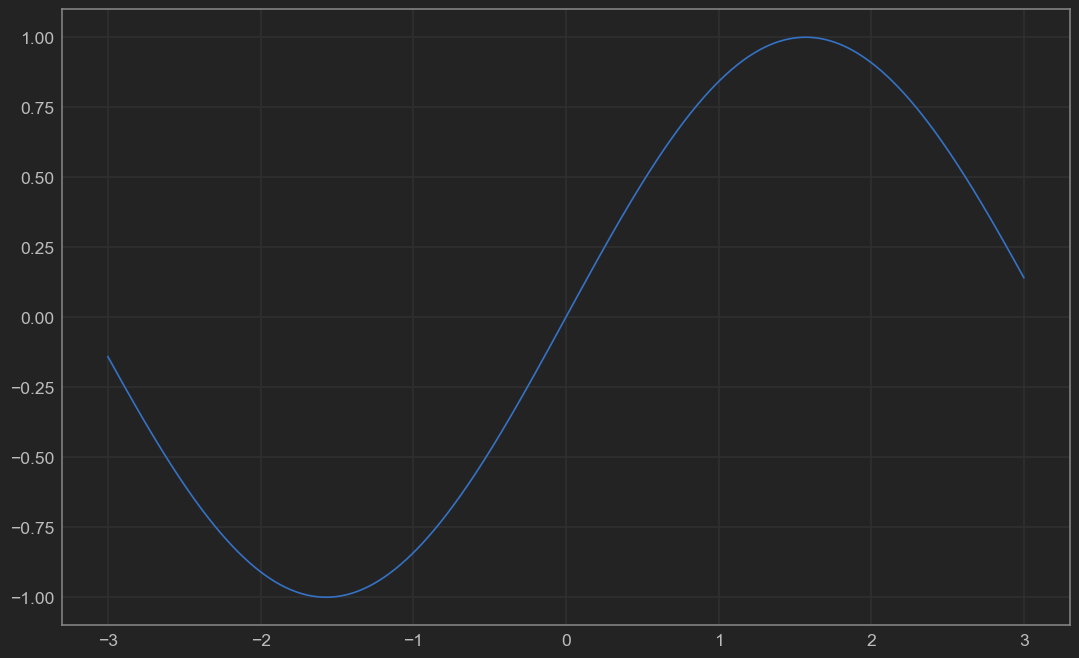

In [56]:
fig, ax = plt.subplots(figsize = (13, 8))

x = np.linspace(-3, 3, 1000)
plt.plot(x, np.sin(x));

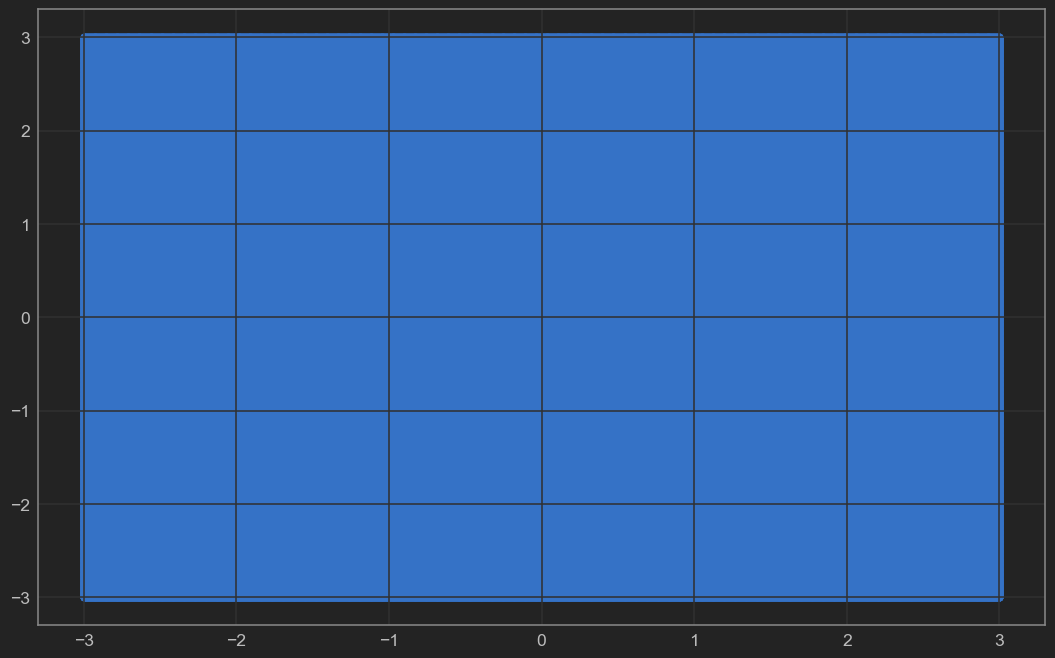

In [61]:
fig, ax = plt.subplots(figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000),
                  np.linspace(-3, 3, 1000))

plt.scatter(X, Y);

In [3]:
from matplotlib import cm

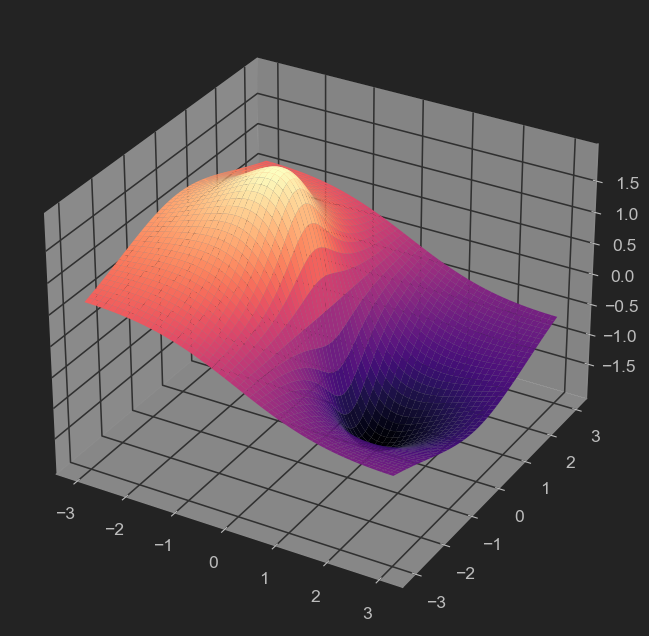

In [65]:
fig, ax = plt.subplots(subplot_kw = {'projection': '3d'}, figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap = cm.magma);

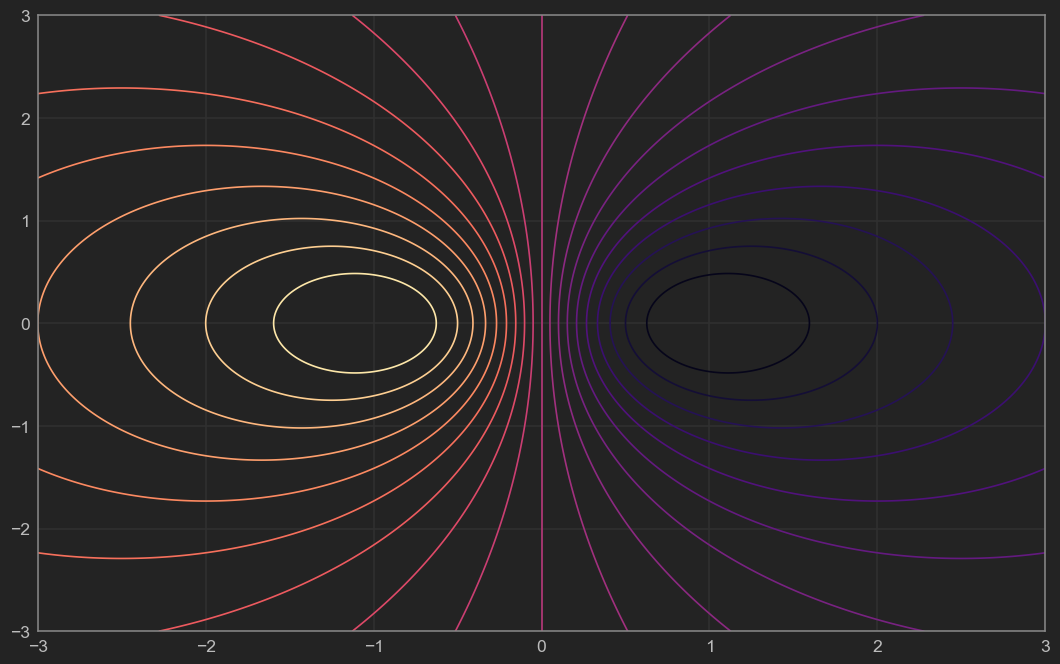

In [68]:
fig, ax = plt.subplots(figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

ax.contour(X, Y, Z, 20,cmap = cm.magma);

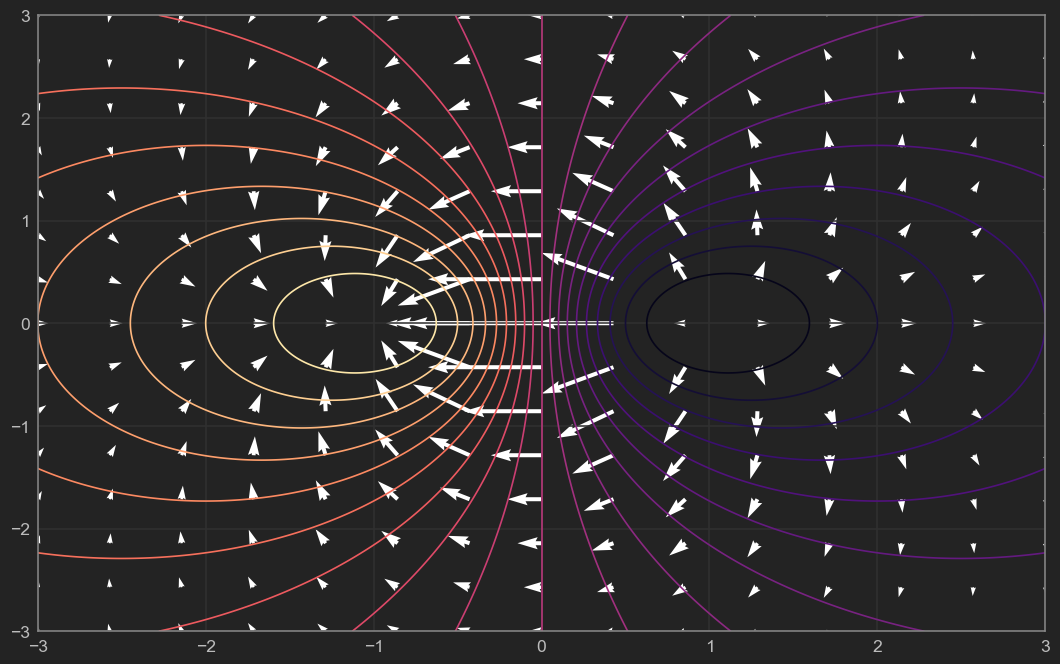

In [81]:
fig, ax = plt.subplots(figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

x1, y1 = np.meshgrid(np.linspace(-3, 3, 15), np.linspace(-3, 3, 15))
U = [gradient(f, (x, y))[0] for x, y in zip(x1.flat, y1.flat)]
V = [gradient(f, (x, y))[1] for x, y in zip(x1.flat, y1.flat)]

ax.contour(X, Y, Z, 20, cmap = cm.magma)
ax.quiver(x1, y1, U, V, color = 'w', scale = 30);

In [82]:
def f(x, y):
    return -(x**2 + y ** 2)

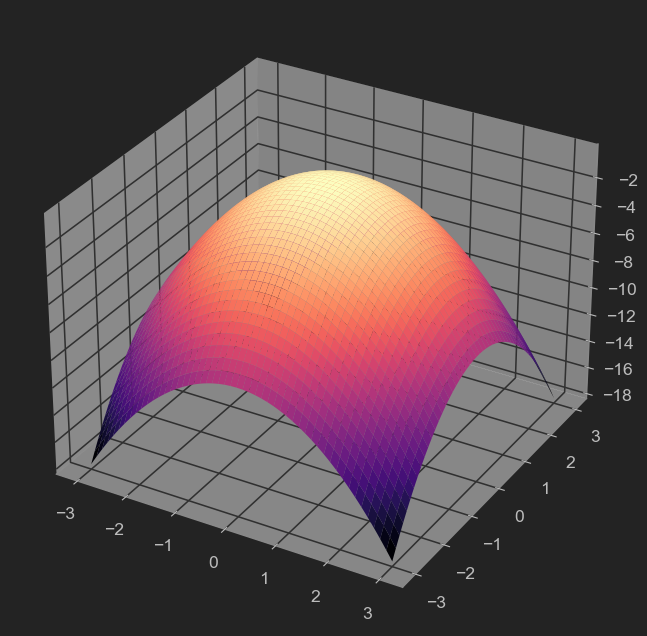

In [83]:
fig, ax = plt.subplots(subplot_kw = {'projection': '3d'}, figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap = cm.magma);

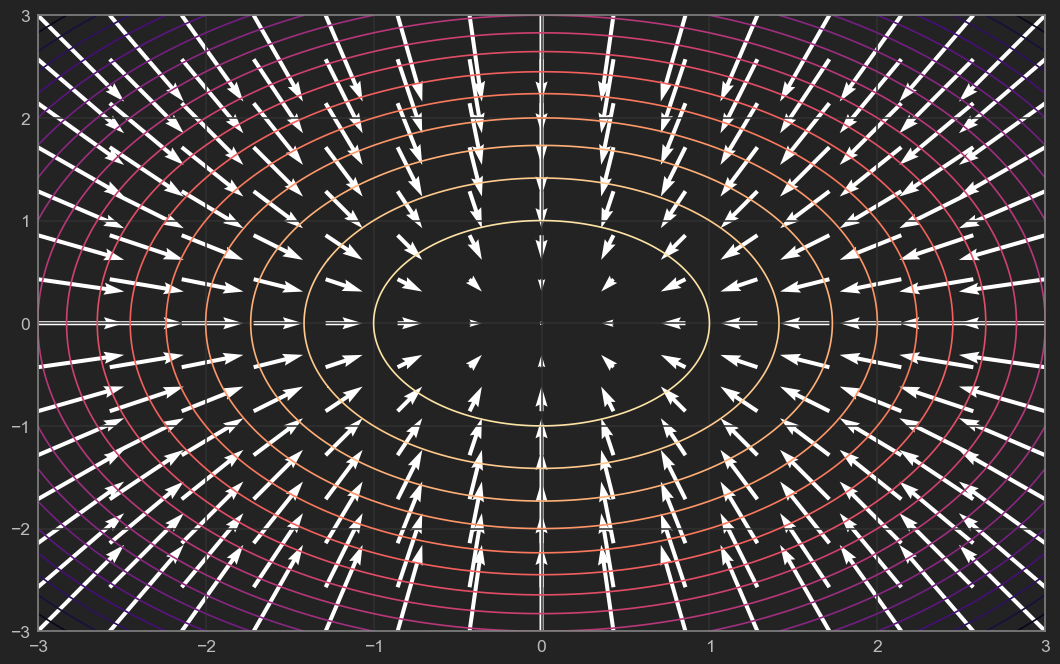

In [85]:
fig, ax = plt.subplots(figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

x1, y1 = np.meshgrid(np.linspace(-3, 3, 15), np.linspace(-3, 3, 15))
U = [gradient(f, (x, y))[0] for x, y in zip(x1.flat, y1.flat)]
V = [gradient(f, (x, y))[1] for x, y in zip(x1.flat, y1.flat)]

ax.contour(X, Y, Z, 20, cmap = cm.magma)
ax.quiver(x1, y1, U, V, color = 'w', scale = 70);

In [86]:
gradient(f, (0, 0))

array([-1.e-06, -1.e-06])

In [87]:
x, y = symbols('x, y')

In [88]:
F = f(x, y)

In [89]:
F

-x**2 - y**2

In [91]:
G = Matrix([F.diff(x), F.diff(y)])

In [92]:
G.evalf(subs = {x: 0, y:0})

Matrix([
[0],
[0]])

In [93]:
def f(x, y):
    return x**2 + y**2

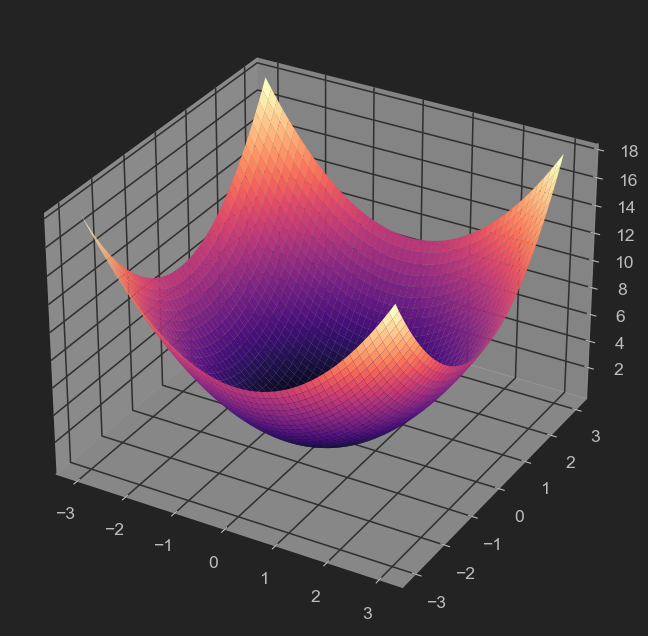

In [94]:
fig, ax = plt.subplots(subplot_kw = {'projection': '3d'}, figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap = cm.magma);

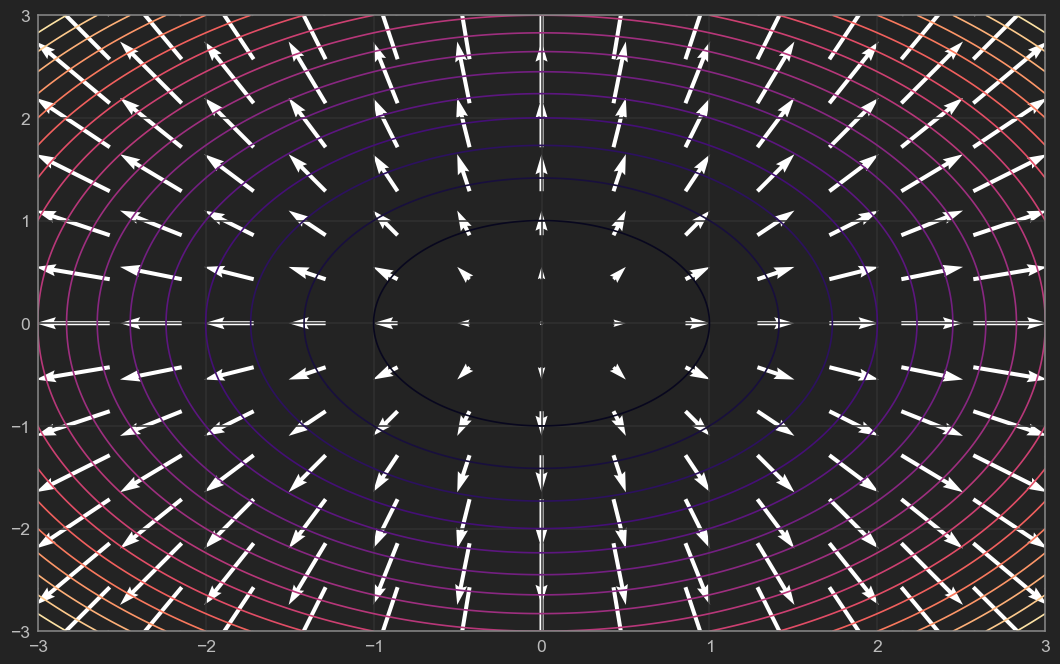

In [95]:
fig, ax = plt.subplots(figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

x1, y1 = np.meshgrid(np.linspace(-3, 3, 15), np.linspace(-3, 3, 15))
U = [gradient(f, (x, y))[0] for x, y in zip(x1.flat, y1.flat)]
V = [gradient(f, (x, y))[1] for x, y in zip(x1.flat, y1.flat)]

ax.contour(X, Y, Z, 20, cmap = cm.magma)
ax.quiver(x1, y1, U, V, color = 'w', scale = 70);

In [96]:
gradient(f, (0, 0))

array([1.e-06, 1.e-06])

In [97]:
x, y = symbols('x, y')

In [98]:
F = f(x, y)

In [99]:
F

x**2 + y**2

In [100]:
G = Matrix([F.diff(x), F.diff(y)])

In [101]:
G

Matrix([
[2*x],
[2*y]])

In [102]:
G.evalf(subs = {x: 0, y:0})

Matrix([
[0],
[0]])

In [103]:
def f(x, y):
    return x ** 2 - y ** 2

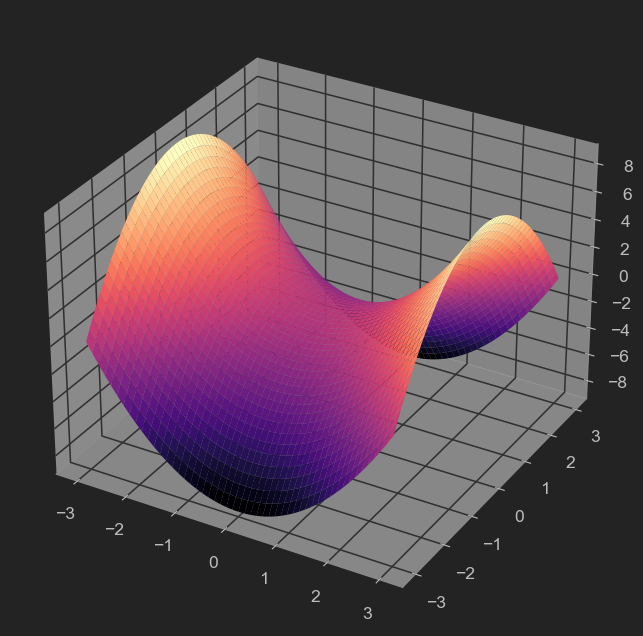

In [104]:
fig, ax = plt.subplots(subplot_kw = {'projection': '3d'}, figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap = cm.magma);

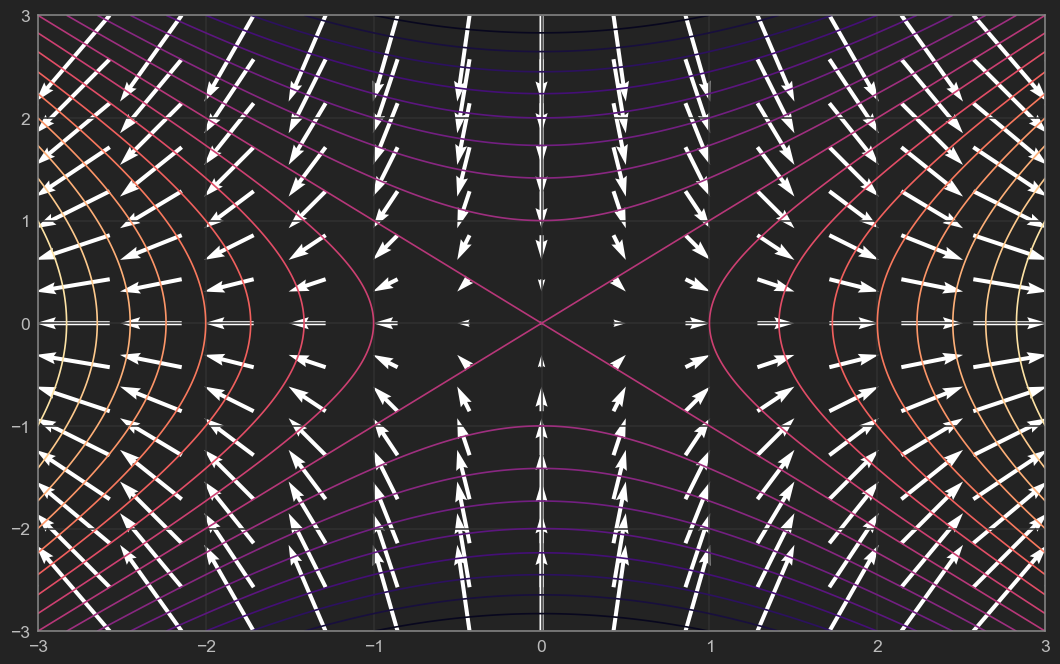

In [105]:
fig, ax = plt.subplots(figsize = (13, 8))

X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
Z = f(X, Y)

x1, y1 = np.meshgrid(np.linspace(-3, 3, 15), np.linspace(-3, 3, 15))
U = [gradient(f, (x, y))[0] for x, y in zip(x1.flat, y1.flat)]
V = [gradient(f, (x, y))[1] for x, y in zip(x1.flat, y1.flat)]

ax.contour(X, Y, Z, 20, cmap = cm.magma)
ax.quiver(x1, y1, U, V, color = 'w', scale = 70);

In [106]:
gradient(f, (0, 0))

array([ 1.e-06, -1.e-06])

In [107]:
x, y = symbols('x, y')

In [108]:
F = f(x, y)

In [109]:
F

x**2 - y**2

In [110]:
G = Matrix([F.diff(x), F.diff(y)])

In [111]:
G

Matrix([
[ 2*x],
[-2*y]])

In [112]:
G.evalf(subs = {x: 0, y:0})

Matrix([
[0],
[0]])

## Matriz Jacobiana


La matriz jacobiana es una matriz formada por las derivadas parciales de primer orden de una función. En este sentido, el jacobiano representa la derivada de una función multivariable. La matriz jacobiana extiende la definición del gradiente a [campos vectoriales](#Glosario), para entenderlo veamos el caso más sencillo, el jacobiano de una función $f : \mathbb{R}^n \to \mathbb{R}$, en este caso particular $f$ es un [campo escalar](#Glosario) y el jacobiano tiene la siguiente forma:


$$\mathbf{J}_f(x_1, x_2, \cdots, x_n) 
=
\begin{bmatrix}
\frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2} & \cdots & \frac{\partial f}{\partial x_n}\\
\end{bmatrix}
$$


Podemos notar que en este caso la matriz jacobiana es un vector renglón que coincide con $\vec{\nabla}f$, cabe destacar que la matriz jacobiana es la transpuesta de $\vec{\nabla}f$ en esta notación.

Ahora extendamos el concepto a un [campo vectorial](#Glosario) $f : \mathbb{R}^n \to \mathbb{R}^m$. Esta función está determinada por m funciones escalares reales:

$$y_{i}=F_{i}(x_{1},\ldots ,x_{n})$$
$$\vec{y}=\vec {F}(\vec{x})=(F_{1}(\vec{x}),\dots ,F_{m}(\vec{x}))$$


En este caso la matriz jacobiana toma la siguiente forma:


$$\mathbf{J}_\vec{f(\vec{x})}
=
\begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \cdots & \frac{\partial y_1}{\partial x_n}\\
\frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \cdots & \frac{\partial y_2}{\partial x_n}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial y_m}{\partial x_1} & \frac{\partial y_m}{\partial x_2} & \cdots & \frac{\partial y_m}{\partial x_n}\\
\end{bmatrix}
$$


Pongamos un ejemplo:

$$F(x_1, x_2, x_3) = (x_1x_2x_3, x_2 - x_3^3)$$

Esta es un [campo vectorial](#Glosario) $f : \mathbb{R}^3 \to \mathbb{R}^2$, noten que podemos simplificar la notación haciendo $\vec{x} \in  \mathbb{R}^3$ tal que $\vec{x} = (x_1, x_2, x_3)$, de esta forma:

$$\vec{F}(\vec{x}) = \vec{y}$$

Donde $\vec{y} = (y_1, y_2)$ y $y_1 =  x_1x_2x_3,$, $y_2 = x_2 - x_3^3$

Entonces la matriz jacobiana de F es:

$$\mathbf{J}_\vec{F(\vec{x})}
=
\begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} &  \frac{\partial y_1}{\partial x_3}\\
\frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} &  \frac{\partial y_2}{\partial x_3}\\
\end{bmatrix}
$$

In [73]:
def f1(x, y, z):
    return x * y * z

In [74]:
def f2(x, y, z):
    return y - z**3

In [75]:
def f(x, y, z):
    return np.array([f1(x, y, z), f2(x, y, z)])

In [76]:
f(1, 2, 3)

array([  6, -25])

In [77]:
x1, x2, x3 = symbols('x_1, x_2, x_3')

In [78]:
F1 = f1(x1, x2, x3)

In [79]:
F2 = f2(x1, x2, x3)

In [80]:
F1

In [81]:
F2

In [82]:
F = Matrix([F1, F2])

In [12]:
F

Matrix([
[ x_1*x_2*x_3],
[x_2 - x_3**3]])

In [13]:
Matrix([[F1.diff(x1), F1.diff(x2), F1.diff(x3)],
       [F2.diff(x1), F2.diff(x2), F2.diff(x3)]])

Matrix([
[x_2*x_3, x_1*x_3,   x_1*x_2],
[      0,       1, -3*x_3**2]])

In [25]:
import sympy as sym

def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sym.diff(fi, s)
    return J

Jacobian('x y z', ['x * y * z','y - z**3'])

Matrix([
[y*z, x*z,     x*y],
[  0,   1, -3*z**2]])

In [26]:
import sympy as sym

def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sym.diff(fi, s)
    return J

Jacobian('x1 x2 x3', ['x1 * x2 * x3','x2 - x3**3'])

Matrix([
[x2*x3, x1*x3,    x1*x2],
[    0,     1, -3*x3**2]])

In [83]:
def jacobian (funcs , vals, delta =0.000001):
    j = [gradient(funcs[i],vals,delta = delta) for i in range(len(funcs))]
    return np.array(j)

In [84]:
jacobian((f1, f2), (1,2,3))

array([[  6.        ,   3.        ,   2.        ],
       [  0.        ,   1.        , -27.00000901]])

## Matriz Hessiana



Para hablar de la matriz Hessiana vamos a regresar a hablar de [campos escalares](#Glosario), la matriz hessiana de una función $f$ de $n$ variables tal que $f : \mathbb{R}^n \to \mathbb{R}$, es la matriz cuadrada de $n \times n$, de las segundas derivadas parciales.


$$\mathbf{H}_{f(\vec{x})}
=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n}\\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}\\
\end{bmatrix}
$$


Hay que notar que si las derivadas $\frac{\partial^2 f}{\partial x_i x_j}$ existen y son continuas, entonces $\frac{\partial^2 f}{\partial x_i x_j} = \frac{\partial^2 f}{\partial x_j x_i}$ y la matriz hessiana es simétrica.


Ejemplo: $-x^2 -y^2$

$$\frac{\partial^2 f}{\partial x^2} = \frac{\partial^2 f}{\partial x \partial x}$$

In [85]:
def Hessiana (funcs , vals, delta =0.000001):
    j = [gradient(funcs[i],vals,delta = delta) for i in range(len(funcs))]
    return np.array(j)

In [86]:
def f1(x, y):
    return -x**2 - y**2

In [88]:
F1 = f1(x1,x2)

In [89]:
Hessiana(jacobian((f1, f2), (1,2,3)))

TypeError: f1() takes 2 positional arguments but 3 were given

In [90]:
from sympy import symbols, hessian, Function, N

x, y = symbols('x y')
f = symbols('f', cls=Function)

f = -np.power(x, 2) - np.power(y, 2)

H = hessian(f, [x, y]).subs([(x,1), (y,1)])
print(np.array(H))
print(N(H.condition_number()))

[[-2 0]
 [0 -2]]
1.00000000000000


In [91]:
def hessian (func, vals, delta = 0.00001):
    h[]
    for i in range(len(vals)):
        r =[]
        for j in range(len(vals)):
            def df(*vals):
                retur partial(func, vals, delta = delta)
                
            r.append(partial(df,vals,j,delta = delta))
        h.append(r)
    return np.array(n)

SyntaxError: invalid syntax (2727463762.py, line 2)

### Matriz Hessiana y puntos críticos

La matriz hessiana nos va a ser de utilidad para poder saber si un [punto crítico](#Glosario) de nuestra función es un máximo, un mínimo, o un punto silla, para esto nos debemos de fijar en la matriz hessiana evaluada en el [punto crítico](#Glosario):

- si $det(H) < 0$ es un punto silla.
- si $det(H) > 0$ entonces tenemos un máximo o un mínimo.
    - si el primer elemento $h_{11}$ de la matriz es positivo entonces tenemos un mínimo.
    - si el primer elemento $h_{11}$ de la matriz es negativo, entonces tenemos un máximo.
    
- si $det(H) = 0$ entonces hay duda.

veamos un par de ejemplos.

$$\frac{d}{dx} f(g(x)) = \frac{df}{dg} \frac{dg}{dx}$$

<hr>

<h2>Regla de la cadena varias variables</h2>


Cuando se tiene una composición de funciones de varias variables la regla de cadena cambia un poco

en el caso de una función $f(x_1(t), x_2(t), \cdots, x_n(t))$ se tiene que:

$$ \frac{d}{dt}f = \frac{\partial f}{\partial x_1} \frac{dx_1}{dt} + \frac{\partial f}{\partial x_2} \frac{dx_2}{dt} +  \cdots + \frac{\partial f}{\partial x_n} \frac{dx_n}{dt}$$


Si recordamos la sección de álgebra lineal notaremos que podemos escribir la regla de la cadena como sigue:

$$ \frac{d}{dt}f =
\begin{bmatrix}
\frac{\partial f}{\partial x_1}\\
\frac{\partial f}{\partial x_2}\\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{dx_1}{dt}\\
\frac{dx_2}{dt}\\
\vdots \\
\frac{dx_n}{dt}
\end{bmatrix}
$$

$$ \frac{d}{dt}f = \vec{\nabla} f \cdot \frac{d}{dt} \vec{x}$$


También usando el concepto de la matriz jacobiana podemos escribir este caso de la regla de la cadena como sigue:



$$ \frac{d}{dt}f =
\begin{bmatrix}
\frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2} & \cdots & \frac{\partial f}{\partial x_n}\\
\end{bmatrix}
\begin{bmatrix}
\frac{dx_1}{dt}\\
\frac{dx_2}{dt}\\
\vdots \\
\frac{dx_n}{dt}
\end{bmatrix}
$$

Podemos escribir la regla de la cadena de una forma más similar a la definición de una variable:

$$ \frac{d}{dt}f =  \mathbf{J}_f \frac{\vec{dx}}{dt}$$

En este caso la regla de la cadena la estamos expresando como el producto de dos matrices.

Ahora supongamos que tenemos una función $f(\vec{x}(\vec{u}(t)))$, $f : \mathbb{R}^n \to \mathbb{R}$, $\vec{x}$ es una función tal que $x : \mathbb{R}^m \to \mathbb{R}^n$ y por ultimo $\vec{u}$ una función $u : \mathbb{R} \to \mathbb{R}^m$. Para poner un ejemplo supongamos que $\vec{x} = (x_1, x_2)$ y $\vec{u} = (u_1(t), u_2(t))$. Al agregar un eslabón más a la cadena vamos a incrementar en un termino más la expresión de la regla de la cadena, sería algo como lo siguiente:


$$ \frac{d}{dt}f =
\begin{bmatrix}
\frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2}\\
\end{bmatrix}
\begin{bmatrix}
\frac{\partial x_1}{\partial u_1} & \frac{\partial x_1}{\partial u_2}\\
\frac{\partial x_2}{\partial u_1} & \frac{\partial x_2}{\partial u_2}\\
\end{bmatrix}
\begin{bmatrix}
\frac{du_1}{dt}\\
\frac{du_2}{dt}\\
\end{bmatrix}
$$


$$\frac{d}{dt}f =  \mathbf{J}_f \mathbf{J}_x \frac{\vec{du}}{dt}$$


La regla de la cadena tomara importancia en un futuro si se trabaja con redes neuronales. Pero, ¿cómo funcionan? A menudo verás diagramas como éste, donde los círculos son neuronas, y las líneas son la red de conexiones entre ellas. Esto podría sonar lejano a los temas que hemos cubierto hasta ahora, pero fundamentalmente, una red neuronal es tan solo una función matemática que recibe una variable y devuelve otra variable, donde ambas variables podrían ser vectores. Veamos ahora el caso más simple posible, de tal manera que podamos traducir estos diagramas en algunas fórmulas. 


<img src="red una neurona.png" width = 400 height = 400>



Aquí tenemos una red, la cual toma una variable escalar única a la que llamaremos a0, y devuelve otro escalar a1. Podemos escribir esta función así: 

$$a^{(1)} = \sigma (w a^{(0)} + b)$$

Donde $b$ y $w$ son constantes, pero $\sigma$ es ella misma una función. En este punto es útil dar a cada uno de estos términos un nombre, ya que ayudará a seguirlos cuando las cosas se compliquen un poco más. Los términos a se llaman actividades, $w$ es un peso, $b$ es un umbral y sigma es lo que llamamos la **función de activación**. Sigma es lo que permite asociar a las redes neuronales con el cerebro. Las neuronas en el cerebro reciben información de sus vecinos mediante estimulación química y eléctrica. Y cuando la suma de todas estas estimulaciones va más allá de un cierto umbral, la neurona repentinamente se activa y comienza a su vez a estimular a sus vecinos. Un ejemplo de función que tiene esta propiedad umbral es la función tangente hiperbólica, tanh, la cual es una función continua que va de menos uno a uno. 


$$a^{(1)} = \sigma (w_0 a^{(0)} + w_1 a_1^{(0)} + b)$$

La tanh pertenece a una familia de funciones similares, todas con esta forma de S característica, llamadas sigmoideas. Por esta razón usamos sigma para este término. 



<img src="Red neuronal.png" width = 400 height = 400>


Podemos ver que al incrementar el número de neuronas la red se complica, pero la regla de la cadena cobra relevancia para poder saber cómo cambia una neurona con respecto a las variables de entrada.

<hr>
<h2>Optimización</h2>
<h3>Descenso del gradiente</h3>

Vamos a hablar de optimización, que es la gran aplicación del cálculo en los temas que nos interesaran, el primer método que veremos es el descenso del gradiente. Si el gradiente señala la dirección de mayor crecimiento de la función $f$, es natural pensar que si lo _seguimos_ nos llevará al valor máximo de $f$, y si vamos en contra de él nos conducirá a un mínimo, si es que estos puntos existen. Esta idea es la que va detrás del método del _descenso del gradiente_ que nos permite optimizar funciones no restringidas.




In [4]:
# Importamos nuestras librerias y ejecutamos el template de visuealizacion
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


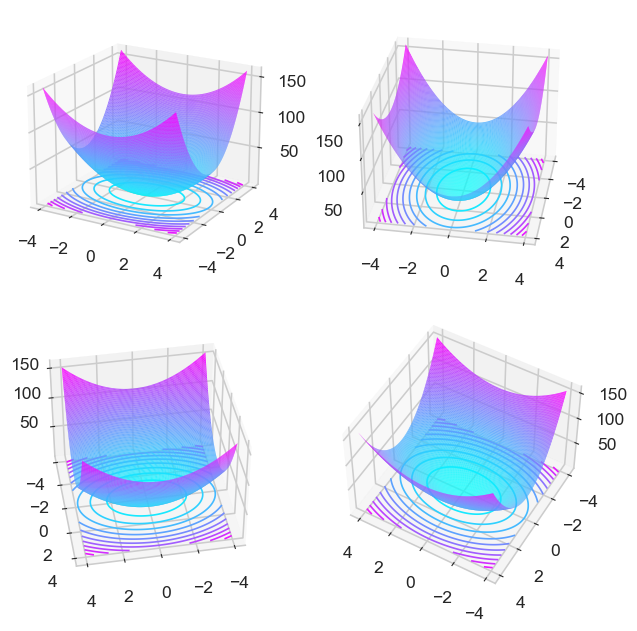

In [100]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(7.5, 7.5))

subp = [ax1, ax2, ax3, ax4]

azim = [-60, 10, 80, 120]
elev = [20, 30, 40, 50]

def f(x,y):
    return 3*x**2 + 7*y**2

N = 100

x = np.linspace(-4, 4, N)
y = np.linspace(-4, 4, N)

X,Y = np.meshgrid(x,y)

Z = f(X, Y)

for count, ax in enumerate(subp):
    ax.plot_surface(X, Y, Z, cmap= cm.cool, rstride=6, cstride=6, alpha=1)
    ax.contour(X, Y, Z, 10, cmap="cool", linestyles="solid", offset=-1)

    ax.azim = azim[count]
    ax.elev = elev[count]

plt.show()

[-1.77132502e-03 -4.98554817e-05]


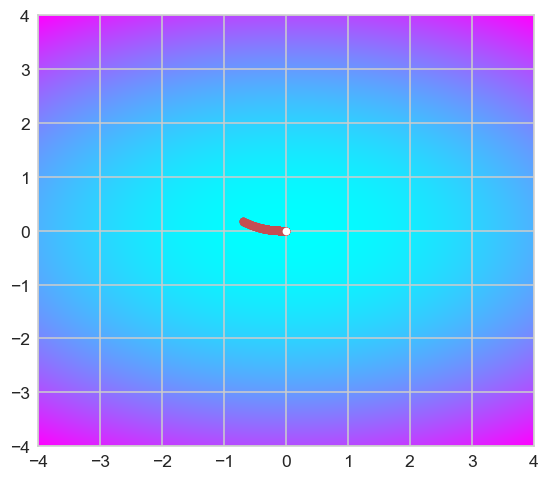

In [118]:
level_map = np.linspace(np.min(Z), np.max(Z), N)

plt.contourf(X, Y, Z, levels=level_map, cmap=cm.cool)

p = np.random.rand(2) * 8 - 4

plt.plot(p[0], p[1], 'o', c='b')

#p[0]=23
#p[1]=18

h = 0.0001

lr = 0.0001

def derivate(cp, p):
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

def gradient(p):
    grad = np.zeros(2)
    for idx, val in enumerate(p):
        cp = np.copy(p)
        cp[idx] = cp[idx] + h
        
        dp = derivate(cp, p)
        grad[idx] = dp
    return grad

for i in range(10000):
    p = p - lr * gradient(p)
    if(i % 10 == 0):
        
        plt.plot(p[0], p[1], 'o', c='r')
        
plt.plot(p[0], p[1], 'o', c='w')    
print(p)

La idea es seria la siguiente:

$$ x_1 = x_0 - \alpha \nabla f(x_0)$$


¿Qué es lo que esta fórmula nos quiere decir?, bueno para empezar notemos que es un método iterativo, es decir lo debemos aplicar por pasos, empezaremos en una posición aleatoria, y el siguiente punto será la posición del anterior menos una fracción del gradiente, esta resta es equivalente a moverse en la dirección contraria a la que apunta el gradiente, es decir en dirección a un hipotético mínimo.

Geométricamente ocurre algo como esto:

<img src="Descenso del gradiente 1 variable.png" width = 400 height = 400>

<img src="Descenso del gradiente.gif" width = 400 height = 400>


Podemos ver que $\alpha$ es un factor que nos da en cierto sentido el tamaño del paso que damos en cada iteración, si $\alpha$ es muy pequeño tardaremos mucho en llegar al mínimo, o si por lo contrario es demasiado grande puede que nunca lleguemos al mínimo. Al ser un método iterativo nosotros le tenemos que decir cuando parar, lo hacemos cuando:

$$ |x_n - x_{n - 1}| < \epsilon $$

Nosotros decidimos que tan pequeño debe ser $\epsilon$.

## Ejercicio RL




## Ejercicio

Podemos aproximar la función $\sin(x)$ por un polinomio de grado 5en el intervalo $(-3, 3)$, este polinomio de forma general tiene la siguiente forma:

$$p(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4 + a_5 x^5$$

Podemos utilizar el descenso del gradiente para encontrar los coeficientes $(a_0, a_1, a_2, a_3, a_4, a_5)$ que minimicen los errores entre nuestro polinomio y $\sin(x)$, para ello nos apoyaremos del método de mínimos cuadrados que nos define la siguiente función:

$$J(a_0, a_1, a_2, a_3, a_4, a_5) = \int_{-3}^{3} (p(x) - \sin(x))^2dx$$


Si minimizamos la función $J$ encontraremos los coeficiente que buscamos.

- __Use el método del descenso del gradiente para encontrar los coeficientes $(a_0, a_1, a_2, a_3, a_4, a_5)$ y haga una función que se llame *my_sin* que calcule aproximaciones del seno en el intervalo $(-3, 3)$ usando el polinomio de grado 5__

- __Grafique $\sin(x)$ y el polinomio encontrado para ver que tan buena es la aproximación.__


In [5]:
import sympy as sym

In [ ]:
x, a0, a1, a2, a3, a4 , a5 = symbols('x,a_0,a_1,a_2,a_3,a_4,a_5')

In [ ]:
p = a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4 + a5 * x**5

In [8]:
p

a_0 + a_1*x + a_2*x**2 + a_3*x**3 + a_4*x**4 + a_5*x**5

In [10]:
j = (p - sin(x)) ** 2

In [11]:
j

(a_0 + a_1*x + a_2*x**2 + a_3*x**3 + a_4*x**4 + a_5*x**5 - sin(x))**2

In [14]:
integrate(j, (x, -pi, pi))

2*pi*a_0**2 + 4*pi**3*a_0*a_2/3 + 4*pi**5*a_0*a_4/5 + 2*pi**3*a_1**2/3 + 4*pi**5*a_1*a_3/5 + 4*pi**7*a_1*a_5/7 - 4*pi*a_1 + 2*pi**5*a_2**2/5 + 4*pi**7*a_2*a_4/7 + 2*pi**7*a_3**2/7 + 4*pi**9*a_3*a_5/9 - 4*pi**3*a_3 + 24*pi*a_3 + 2*pi**9*a_4**2/9 + 2*pi**11*a_5**2/11 - 480*pi*a_5 - 4*pi**5*a_5 + 80*pi**3*a_5 + pi

In [16]:
def s(w0, w1, w2, w3, w4, w5):
    r = 2 * np.pi * w0**2 + 4 * np.pi**3 * w0*w2/3 + 4 * np.pi**5 * w0*w4/5 + 2 * np.pi**3 * w1**2/3 + 4 * np.pi**5 * w1*w3/5 + 4 * np.pi**7 * w1*w5/7 - 4 * np.pi*w1 + 2 * np.pi**5 * w2**2/5 + 4 * np.pi**7 * w2*w4/7 + 2 * np.pi**7 * w3**2/7+ 4 * np.pi**9 * w3*w5/9 - 4 * np.pi**3*w3 + 24*np.pi*w3 + 2* np.pi**9 * w4**2/9 + 2* np.pi**11 * w5**2/11 - 480*np.pi*w5 - 4*np.pi**5*w5 + 80*np.pi**3*w5 + np.pi
    return r

In [250]:
s(3, 1,1,1,1,1), s(1, 1, 1,1,1,1), s(2.8, 3,1,1,1,1)

(78672.39988308724, 78049.81950049255, 82689.50915039428)

In [38]:
def gradient(func: "Function", vals, delta = 0.000001):
    return np.array([partial(func, vals, i, delta = delta) for i in range(len(vals))])

In [39]:
def grandient_dec(func: "Function", x0: tuple,
                 epsilon: float = 0.001,
                 max_iter: int = 10_000,
                 alpha: float = 0.3,
                 delta: float = 1e-6,
                 orbit: bool = False,
                 verbose = False):
    
    x0 = np.array(x0, dtype = float)
    x1 = x0 - alpha * gradient(func, x0, delta = delta)
    
    points = [x0, x1]
    
    i = 1
    while np.linalg.norm(x1 - x0) > epsilon and i <= max_iter:
        x0 = x1
        x1 = x0 - alpha * gradient(func, x0, delta = delta)
        points.append(x1)
        i += 1
        
    if verbose:
        print('Iteraciones: ', i)
    
    if orbit:
        return x1, points
    
    return x1

In [40]:
x0 = np.random.randint(15, 25, 2)

In [41]:
x0 = np.random.random(6)

In [42]:
x0

array([0.79642203, 0.94269081, 0.96958157, 0.3951902 , 0.62250988,
       0.10667741])

In [228]:
a, e , m = 0.184e-4, 1e-9, 1e+6
min_, orbit = grandient_dec(s, x0, orbit = True, verbose=True, alpha=a, epsilon = e, max_iter = m)

Iteraciones:  257402


In [229]:
min_

array([-6.51304110e-05,  9.87252353e-01,  6.78232906e-05, -1.54981165e-01,
       -8.13181282e-06,  5.61651204e-03])

In [230]:
orbit;

In [231]:
[s(*p) for p in orbit];

Text(0, 0.5, 'Valor de S')

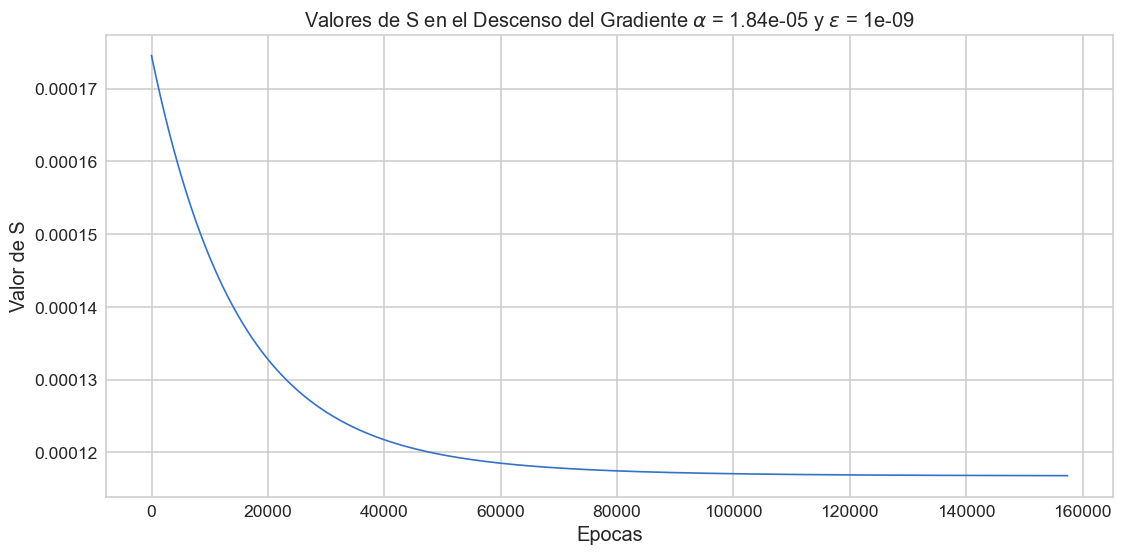

In [243]:
fig, ax = plt.subplots(figsize = (13, 6))

vals = [s(*p) for p in orbit]

ax.plot(vals[100000:])

ax.set_title(f'Valores de S en el Descenso del Gradiente $\\alpha$ = {a} y $\\epsilon$ = {e}')
ax.set_xlabel('Epocas')
ax.set_ylabel('Valor de S')


In [244]:
min_, s(*min_), s(2.8, 3,1,1,1,1)

(array([-6.51304110e-05,  9.87252353e-01,  6.78232906e-05, -1.54981165e-01,
        -8.13181282e-06,  5.61651204e-03]),
 0.00011680273713032818,
 82689.50915039428)

In [245]:
def model(x):
    return min_[0] + min_[1] * x + min_[2] * x**2 + min_[3] * x**3 + min_[4] * x**4 + min_[5] * x**5

In [246]:
model(3)

0.14196461937432625

In [247]:
min_

array([-6.51304110e-05,  9.87252353e-01,  6.78232906e-05, -1.54981165e-01,
       -8.13181282e-06,  5.61651204e-03])

In [248]:
np.sin(3)

0.1411200080598672

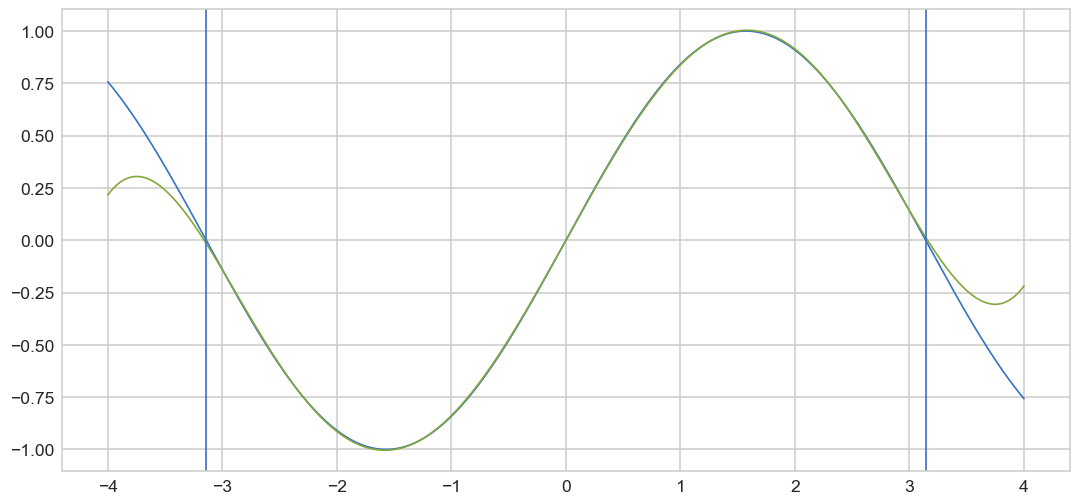

In [249]:
fig, ax = plt.subplots(figsize = (13, 6))

vals = np.linspace(-4,4,1000)

ax.plot(vals,np.sin(vals))

ax.plot(vals,model(vals))

ax.axvline(np.pi)
ax.axvline(-np.pi)
